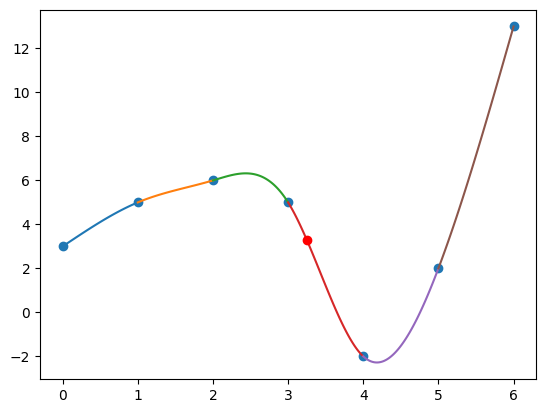

f(3.25) =  3.284855769230769


In [14]:
import matplotlib.pyplot as plt
x = [0, 1, 2, 3, 4, 5, 6]
f = [3, 5, 6, 5, -2, 2, 13]
n = len(x)
h = [x[i+1] - x[i] for i in range(n-1)]
alpha = [0 for i in range(n)]
for i in range(1, n-1):
    alpha[i] = 3 * ((f[i+1] - f[i])/h[i] - (f[i] - f[i-1])/h[i-1])
l = [1] + [0]*(n-2)
mu = [0] * n
z = [0] * n
for i in range(1, n-1):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i]/l[i]
    z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]
l[-1] = 1  
z[-1] = 0
c = [0] * n
b = [0] * n
d = [0] * n
for j in range(n-2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (f[j+1] - f[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
    d[j] = (c[j+1] - c[j])/(3*h[j])
poly = []
for i in range(n-1):
    poly.append([d[i], c[i], b[i], f[i]])
x_est = 3.25
for i in range(n-1):
    if x_est >= x[i] and x_est <= x[i+1]:
        f_est = poly[i][0]*(x_est-x[i])**3 + poly[i][1]*(x_est-x[i])**2 + poly[i][2]*(x_est-x[i]) + poly[i][3]
        break
plt.scatter(x, f)
for i in range(n-1):
    x_vals = [x[i] + j*(x[i+1]-x[i])/100 for j in range(101)]
    y_vals = [poly[i][0]*(x_vals[j]-x[i])**3 + poly[i][1]*(x_vals[j]-x[i])**2 + poly[i][2]*(x_vals[j]-x[i]) + poly[i][3] for j in range(101)]
    plt.plot(x_vals, y_vals)
plt.plot([x_est], [f_est], 'ro')
plt.show()
print("f(3.25) = ", f_est)